In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing data set
df = pd.read_csv('forest_fires.csv')

In [3]:
def data_information(data):
    print("Data shape  number_rows/number_columns{}".format(data.shape))
    print()
    print()
    print("Featurs in data sets are:\n{}".format(data.columns))
    print()
    print()
    print("Statistic view on data \n{}".format(data.describe()))
    print()
    print("Head of data set\n{}".format(data.head(5)))
    print()
    print("Tail of data set\n{}".format(data.tail(5)))
    print()
    print()
    print("Nan values in data set\n{}".format(data.isnull().sum()))

In [4]:
data_information(df)

Data shape  number_rows/number_columns(517, 13)


Featurs in data sets are:
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


Statistic view on data 
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wi

In [5]:
#df_num is sub set of dataframe that consists only numeric values
def numeric_data(data):
    df_num =data.select_dtypes(include=["int64","float64"])
    return df_num

In [6]:
# function corelation matrix(argument is data_set)
def corr_matrix(data):
    df_num=data.select_dtypes(include=["int64","float64"])
    corr_matrix_origin = df_num.corr(method ='pearson')
    list_col_origin = list(df_num.columns)
    plt.figure(figsize = (15,5))
    ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 15},
                linecolor='black', center=False,  linewidths=.5)

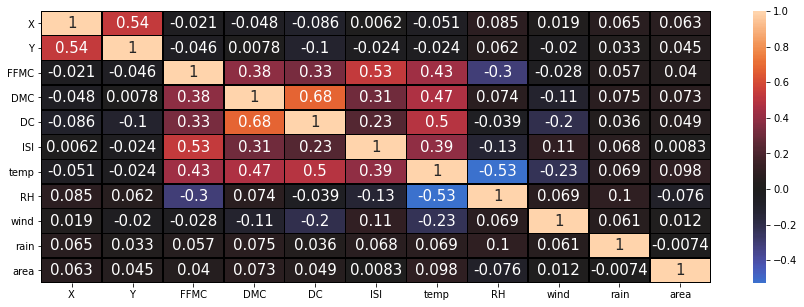

In [7]:
corr_matrix(df)

In [8]:
def numeric_feature_list(data):
    numeric_list=list(numeric_data(data).columns)
    return numeric_list
print(len(numeric_feature_list(df)))


11


In [9]:
#function distribution_histogram (arguments are list on numeric columns,number of row,nomer of columns
#figure size x,figuresize_Y,dataframe )
#functons should plot histograms for all numeric values in dataset, in number matric shape(nrow x ncolm we want)
def distribution_histogram(feature_list,n_row,n_col,f_size1,f_size2,data):
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(feature_list)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[feature_list[i]]
            plot=sns.distplot(x,ax=ax)
        except(IndexError):
            pass

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


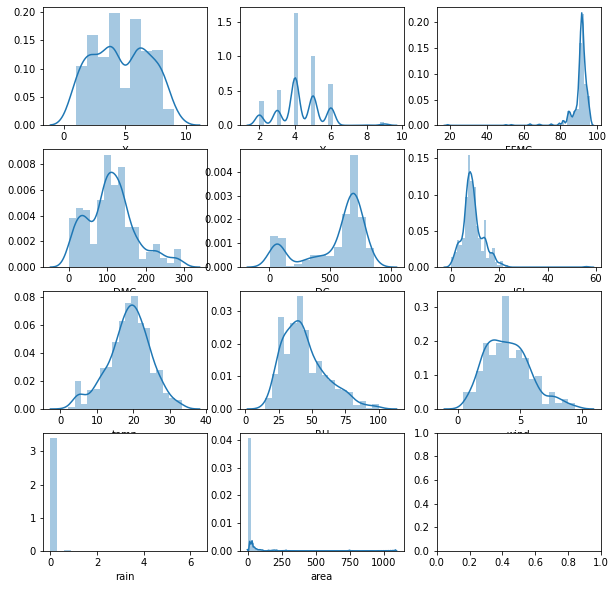

In [10]:
#call of distribution function that plot histograms for all numeric data
#first argument is list of numeric feature ( we make it by function numeric_feature_list)

distribution_histogram(numeric_feature_list(df),4,3,10,10,numeric_data(df))

In [11]:
def distribution_boxplot(feature_list,n_row,n_col,f_size1,f_size2,data):
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(feature_list)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[feature_list[i]]
            plot=sns.boxplot(x,ax=ax)
        except(IndexError):
            pass

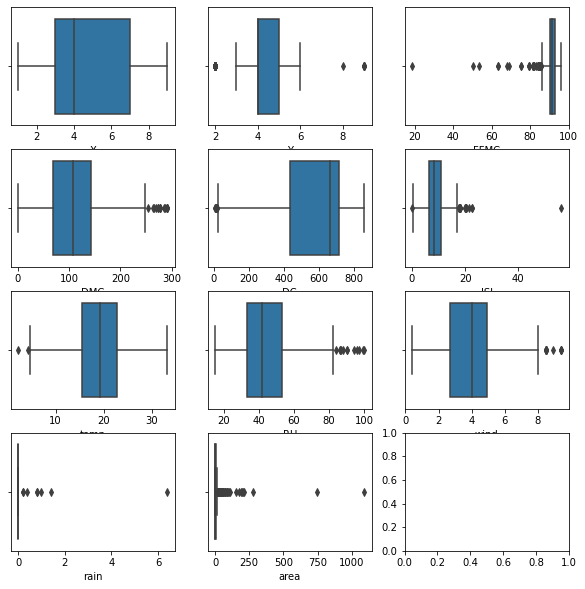

In [12]:

#distribution_histogram(num_cols,3,3,10,10,df_num)
distribution_boxplot(numeric_feature_list(df),4,3,10,10,numeric_data(df))

In [13]:
def count_values(x_value,data_frame,rotation):
    plot = sns.countplot(x =x_value, data=data_frame)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=rotation)

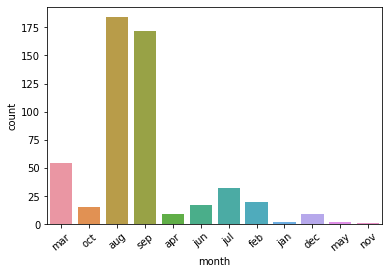

In [14]:
#count number of fire according to the month
count_values("month",df,40)

In [15]:
#dependans of damage aeria according to the firecarasteristic
def dependant_feature_to_undependant(nrow,ncols,figsize1,figsize2,data_set,dependant_feature):
    list_value=numeric_feature_list(data_set)
    list_value.remove(dependant_feature)
    fig, axs = plt.subplots(nrows =nrow,ncols =ncols, figsize = (figsize1,figsize2))
    for i in range(0, len(list_value)):
        try:
            rows =i //ncols
            cols =i % ncols
            ax = axs[rows,cols]
            plot = sns.regplot(x = list_value[i], y = dependant_feature, data =data_set, ax=ax)
        except:
            pass

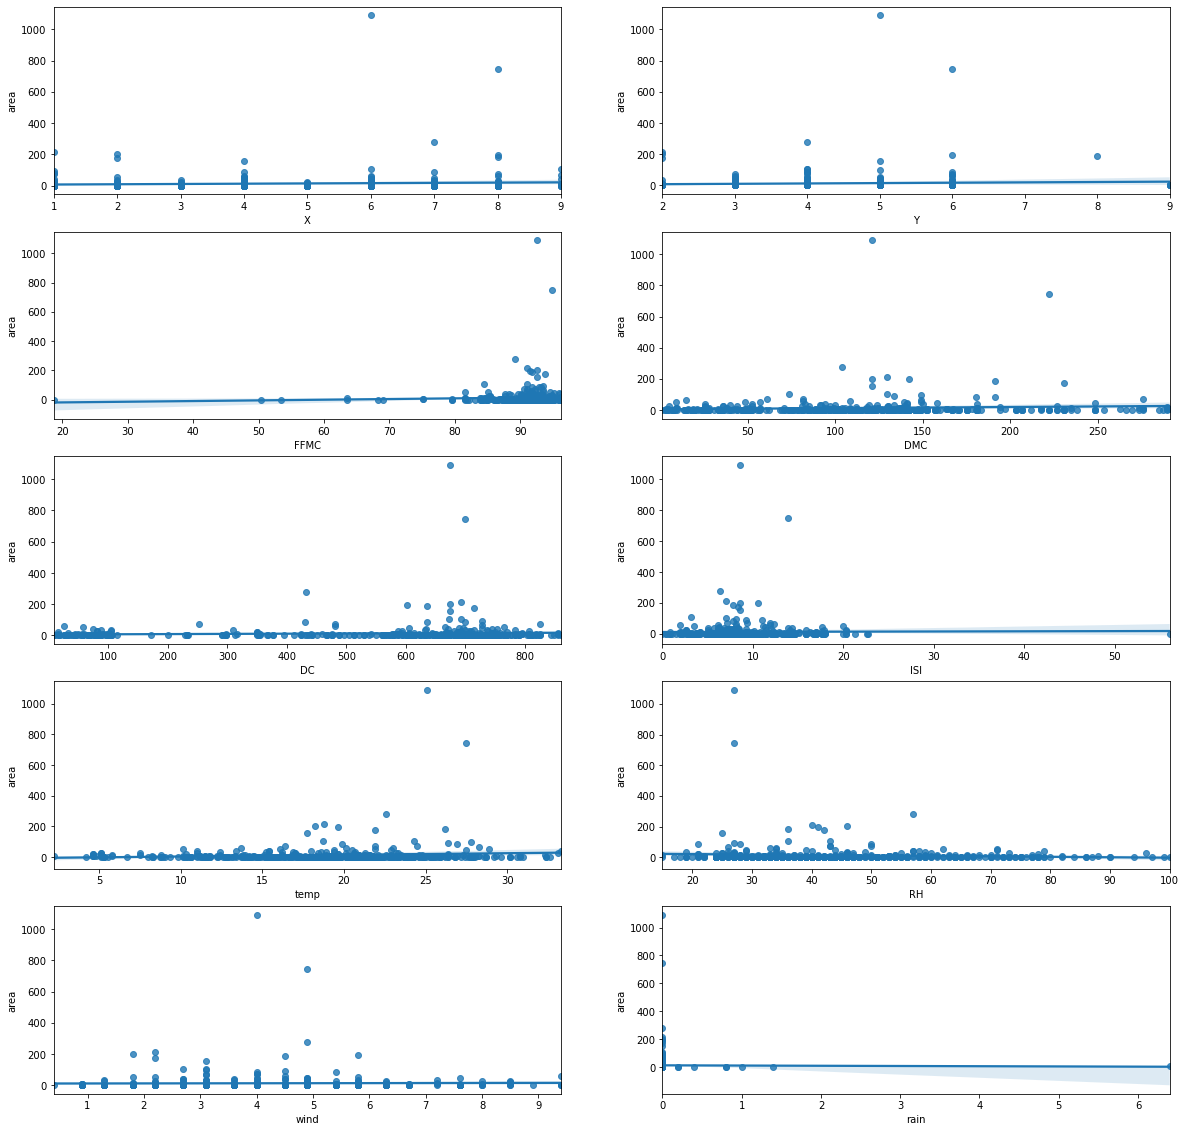

In [16]:
#dependans according to whole dataset
dependant_feature_to_undependant(5,2,20,20,df,"area")

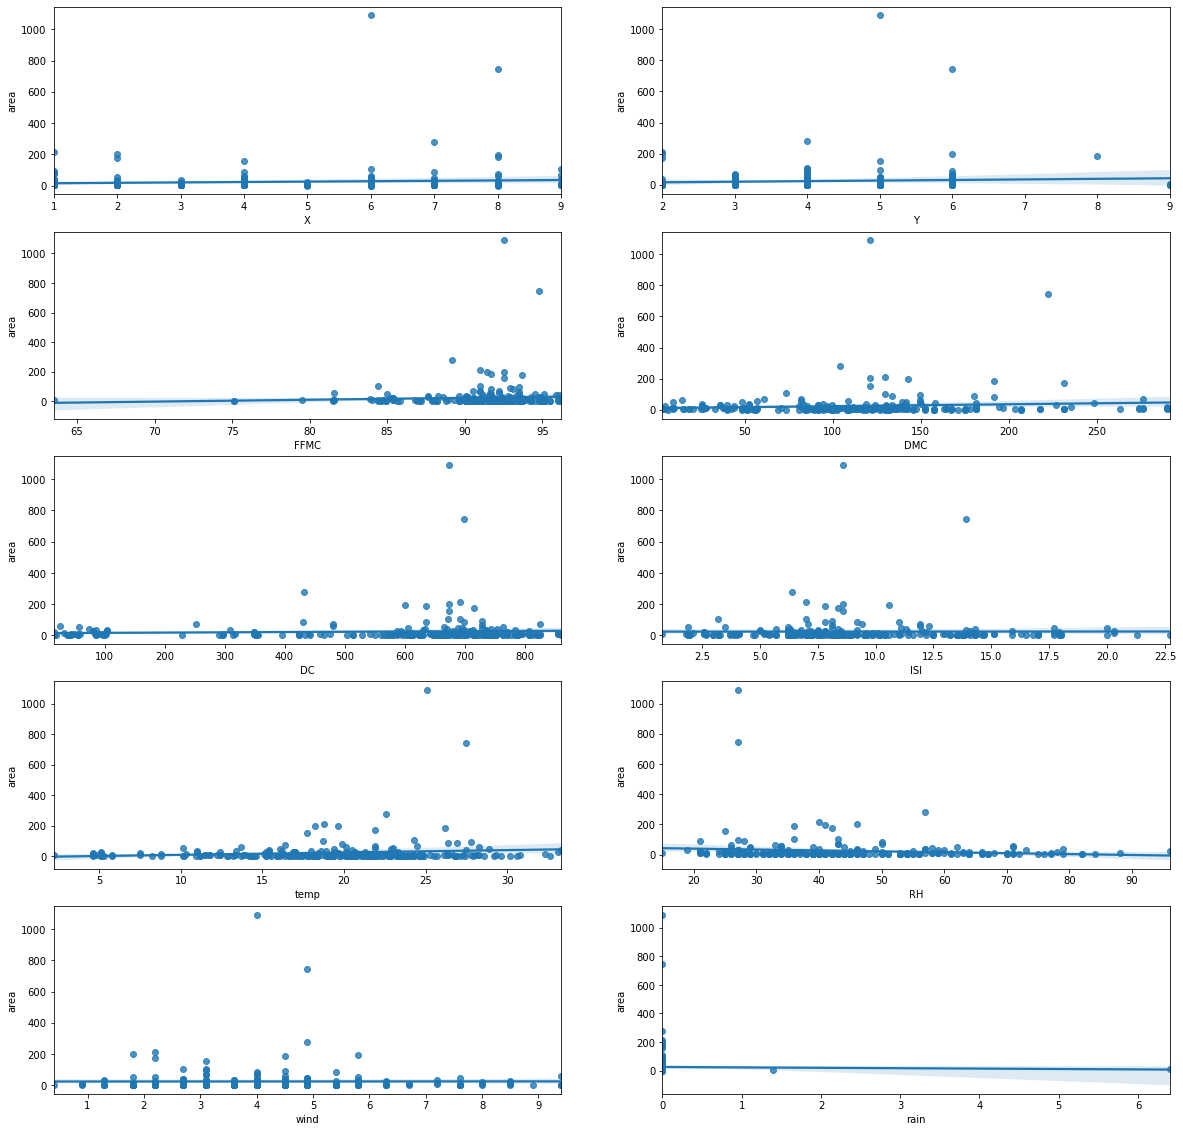

In [17]:
#dependans according to  dataset with rows when damge happend
df2=df[df["area"]>0]
df2
dependant_feature_to_undependant(5,2,20,20,df2,"area")

In [18]:
### Damaged area counts
df["area"].value_counts()

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
        ... 
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

In [19]:
### Deviding area damage to BIG and SMALL
df["area_damage"] = np.where(df["area"] > 3,"Big","Small")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_damage
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,Small
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,Small
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,Small
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,Small
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,Big
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,Big
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,Big
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,Small


In [20]:
def distribution_boxplot(feature_list,n_row,n_col,f_size1,f_size2,data,dependant_value,hue):
    List_indipendant=feature_list
    List_indipendant.remove(dependant_value)
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(List_indipendant)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[List_indipendant[i]]
            y=dependant_value
            plot=sns.boxplot(x, y , hue = hue, data = data,ax=ax)
        except(IndexError):
            pass

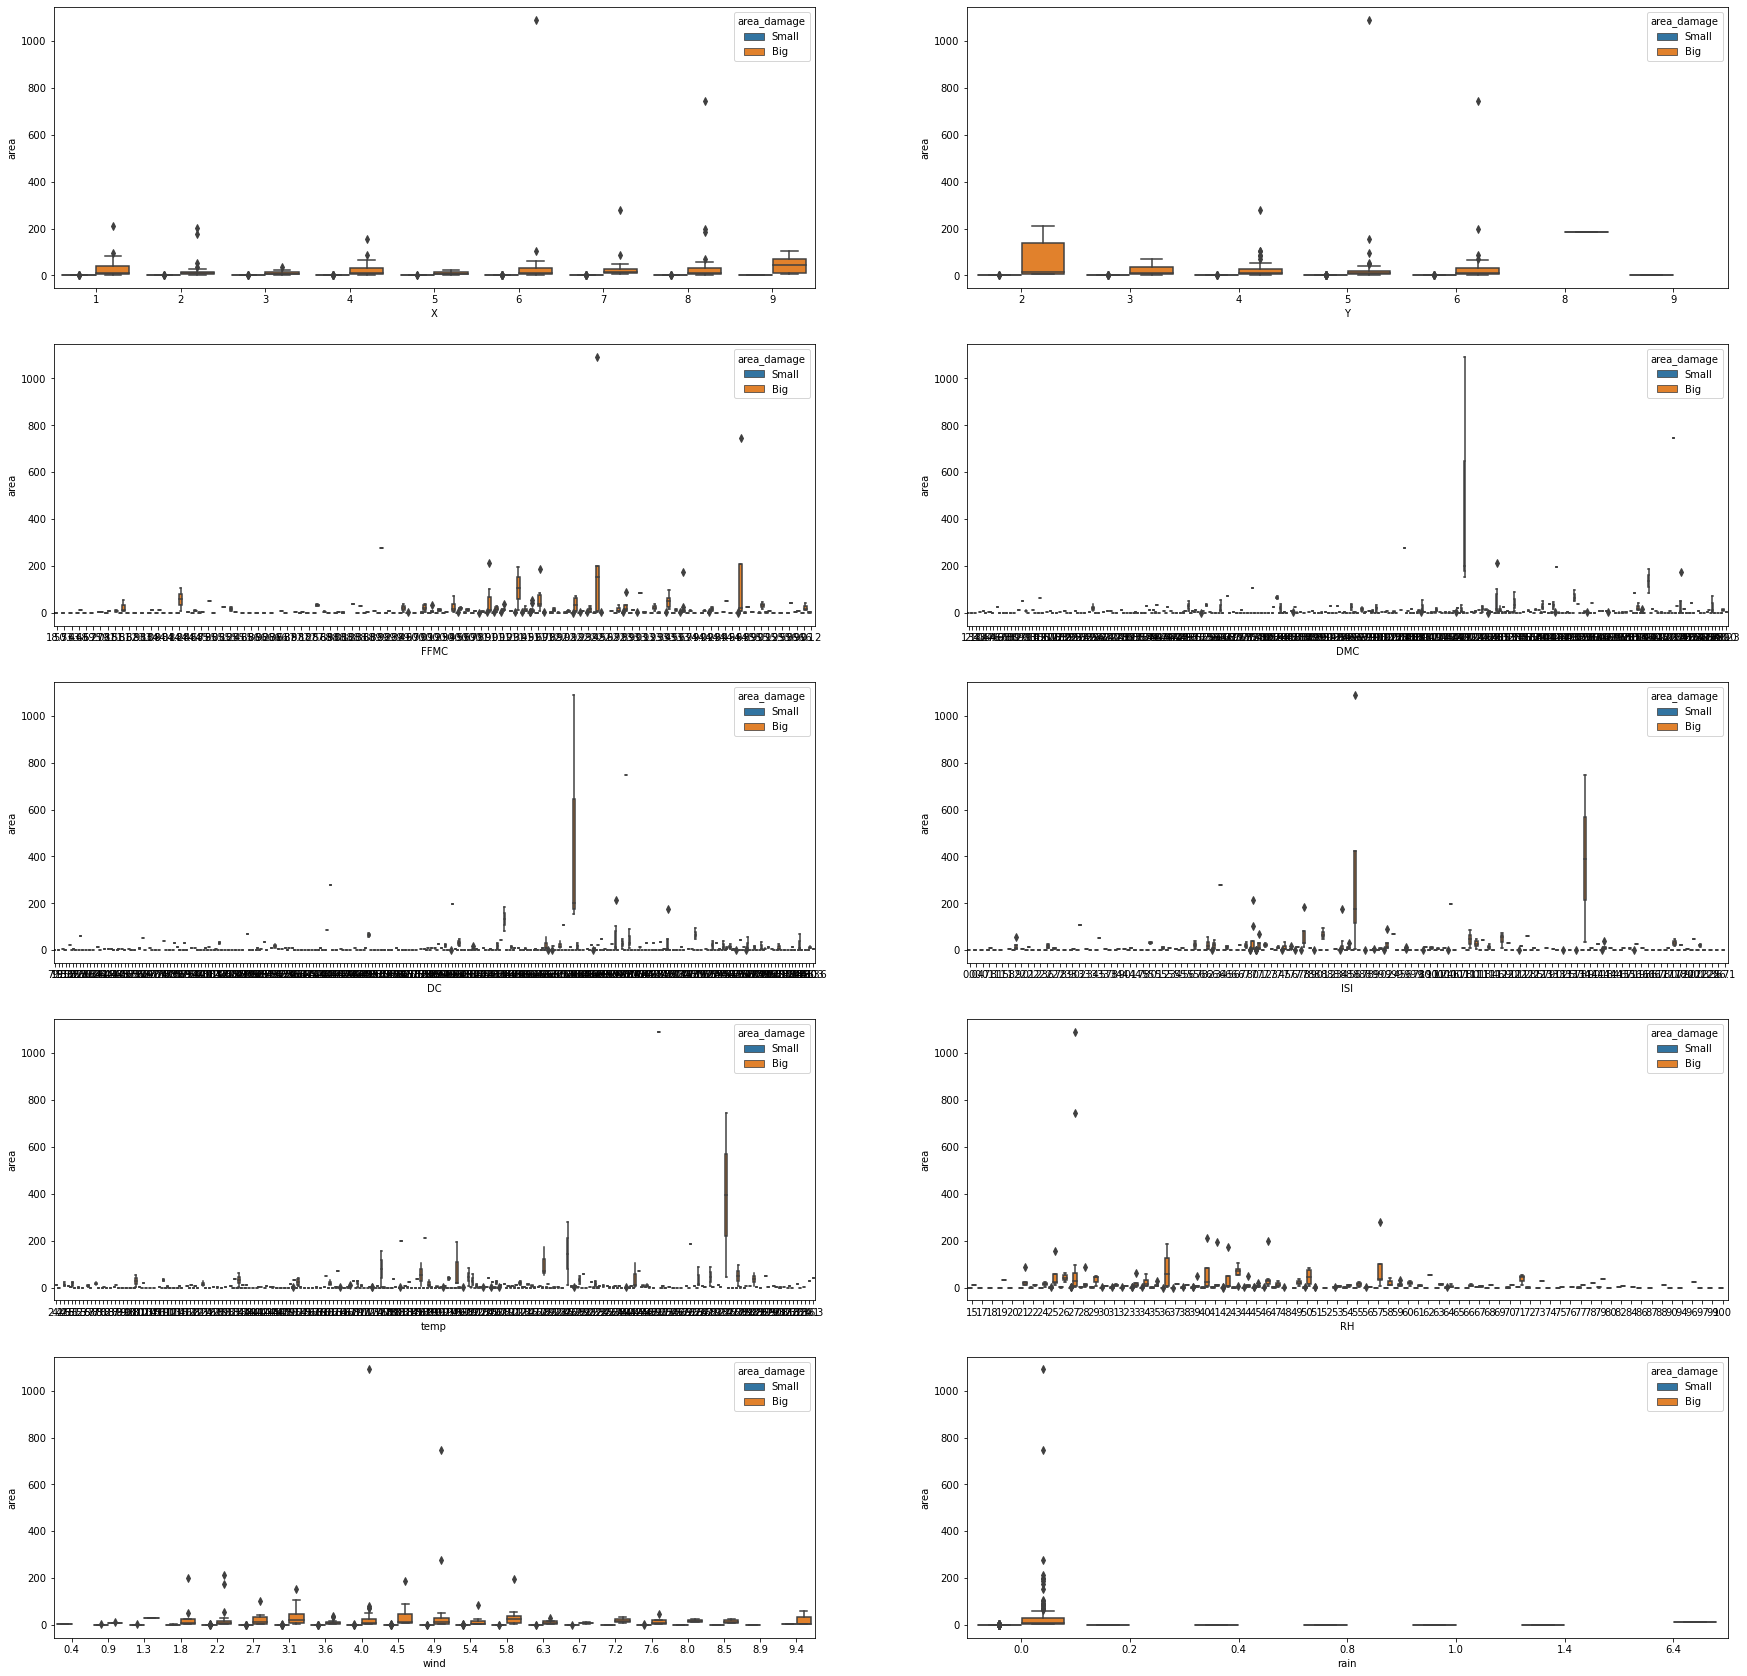

In [21]:
distribution_boxplot(numeric_feature_list(df),5,2,30,30,df,"area","area_damage")

In [22]:
def distribution_scatterplot(feature_list,n_row,n_col,f_size1,f_size2,data,dependant_value,hue):
    List_indipendant=feature_list
    List_indipendant.remove(dependant_value)
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(List_indipendant)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[List_indipendant[i]]
            y=dependant_value
            plot=sns.scatterplot(x, y , hue = hue, data = data,ax=ax,color="purple")
        except(IndexError):
            pass

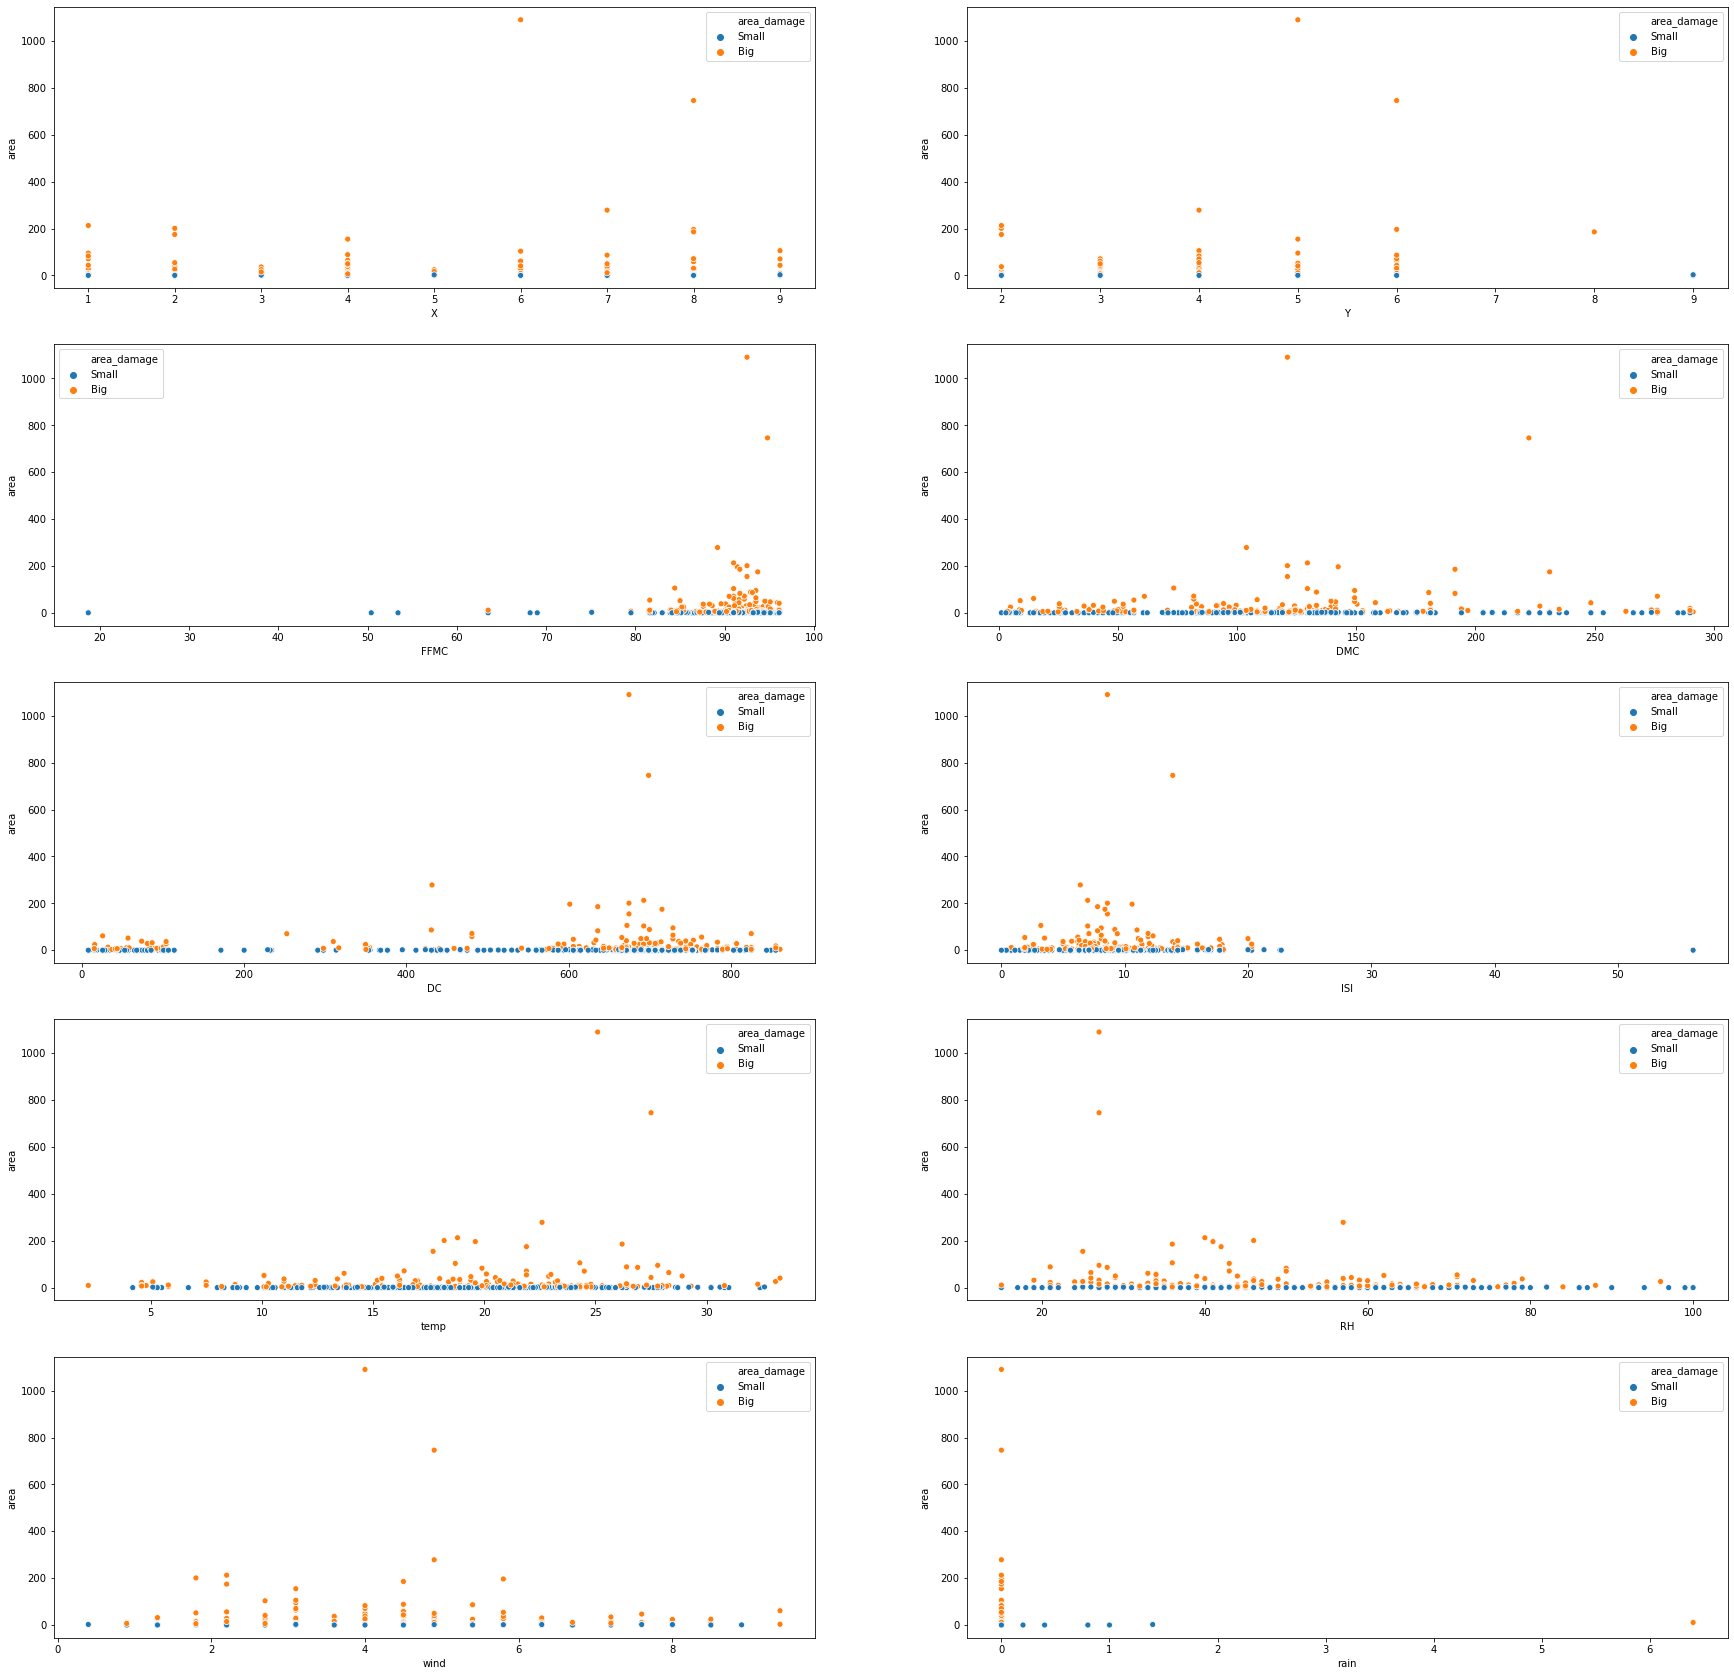

In [23]:
distribution_scatterplot(numeric_feature_list(df),5,2,30,30,df,"area","area_damage")

In [24]:
def one_hot_encoder(feature_name):
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()
    ohe.fit(df.loc[:,[feature_name]])
    df_enc = pd.DataFrame(ohe.transform(df.loc[:, [feature_name]]).toarray(), columns=ohe.get_feature_names())
    return df_enc

In [25]:
df1_enc=one_hot_encoder("month")
df2_enc=one_hot_encoder("day")

In [26]:
# Concatenation of data_set with new df_frames after one_hote_encoder
# if we have more feature to encode in list functon put all new datasets devided by coma
df_transform = pd.concat([df,df1_enc,df2_enc], axis=1)
df_transform.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,x0_nov,x0_oct,x0_sep,x0_fri,x0_mon,x0_sat,x0_sun,x0_thu,x0_tue,x0_wed
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
def drop_categorical_feature(data,features_list):
    df_modeling=data.drop(features_list, axis=1)
    return df_modeling

In [28]:
df_modeling=drop_categorical_feature(df_transform,["month","day"])
df_modeling.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,x0_nov,x0_oct,x0_sep,x0_fri,x0_mon,x0_sat,x0_sun,x0_thu,x0_tue,x0_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Split dataset on train and test

In [29]:
def split_data_set(data,dependant_feature,list_to_remove_X_test,test_size):
    from sklearn.model_selection import train_test_split
    y=data[dependant_feature]
    X=data.drop(list_to_remove_X_test,axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    df_norm = pd.DataFrame(data = X_train, columns =X_train.columns)
    return X_train,X_test,y_train,y_test,df_norm

In [30]:
X_train,X_test,y_train,y_test,df_norm=split_data_set(df_transform,"area",["month","day","area_damage"],0.25)
df_norm.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,x0_nov,x0_oct,x0_sep,x0_fri,x0_mon,x0_sat,x0_sun,x0_thu,x0_tue,x0_wed
516,6,3,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
142,8,6,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
124,3,4,94.3,85.1,692.3,15.9,19.8,50,5.4,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
253,7,4,91.9,109.2,565.5,8.0,21.4,38,2.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59,2,2,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
print("X_train shape:{}\n y_train shape:{}\n X_test shape:{}\n y_test shape:{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))


X_train shape:(387, 30)
 y_train shape:(387,)
 X_test shape:(130, 30)
 y_test shape:(130,)


In [32]:
# Function for normalization of data in data set
def normalisation(X_train,X_test):
    from sklearn.preprocessing import MinMaxScaler
    norm = MinMaxScaler()
    X_train_norm = norm.fit_transform(X_train)
    X_test_norm = norm.transform(X_test)
    return X_train_norm,X_test_norm

In [33]:
X_train_norm,X_test_norm=normalisation(X_train,X_test)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for 

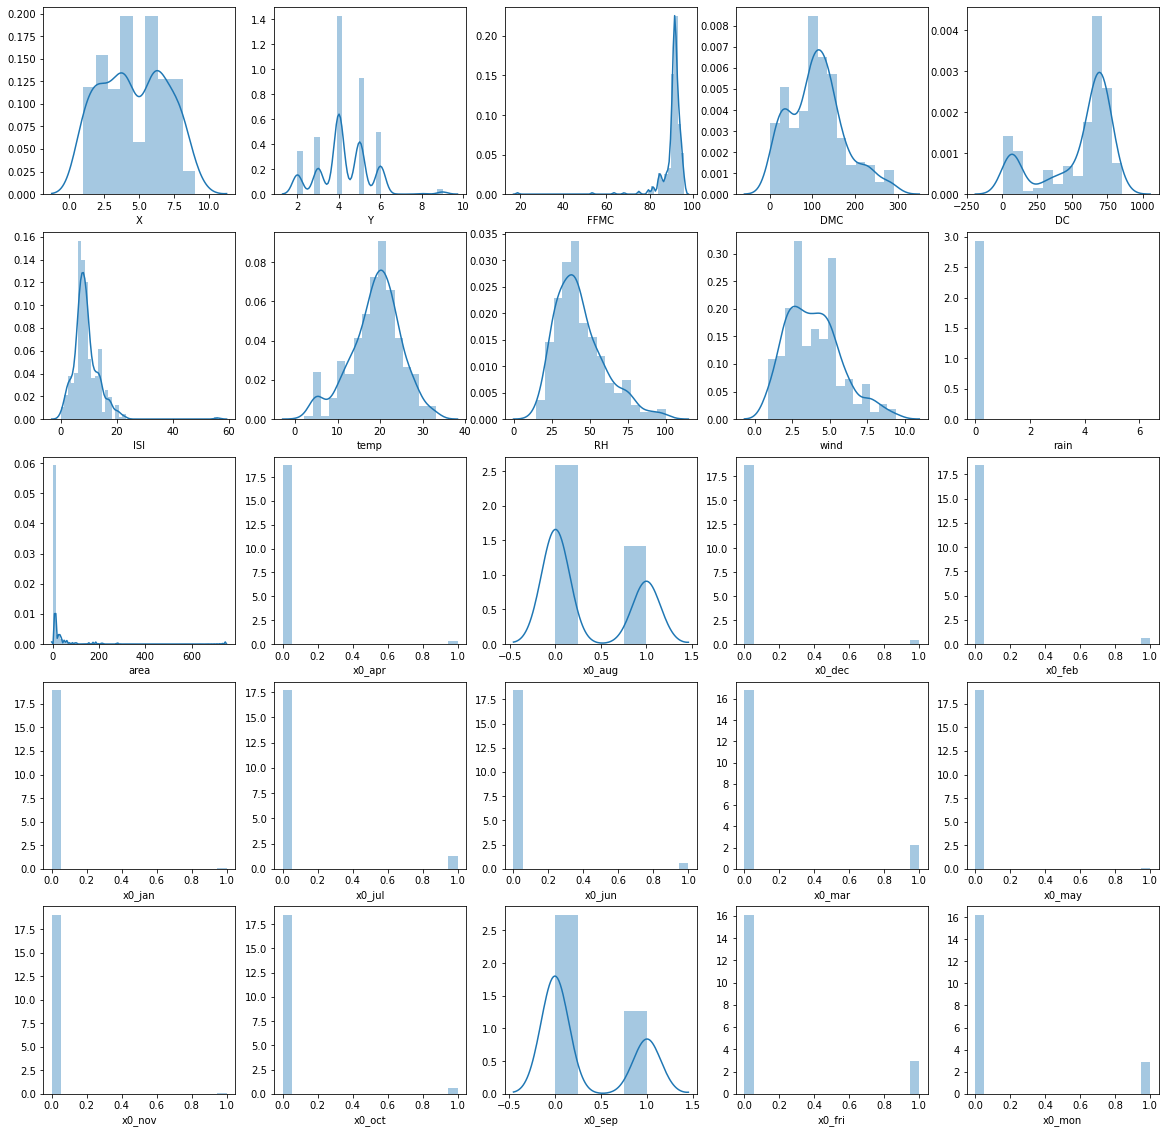

In [34]:
#plot normalized data
distribution_histogram(list(X_train.columns),5,5,20,20,df_norm)

In [35]:
# Function to standardize data 
def standardisation(X_train):
    from sklearn.preprocessing import StandardScaler
    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    df_std = pd.DataFrame(data = X_train_std, columns = X_train.columns)
    return X_train_std,X_test_std,df_std

In [36]:
X_train_std,X_test_std,df_std=standardisation(X_train)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for 

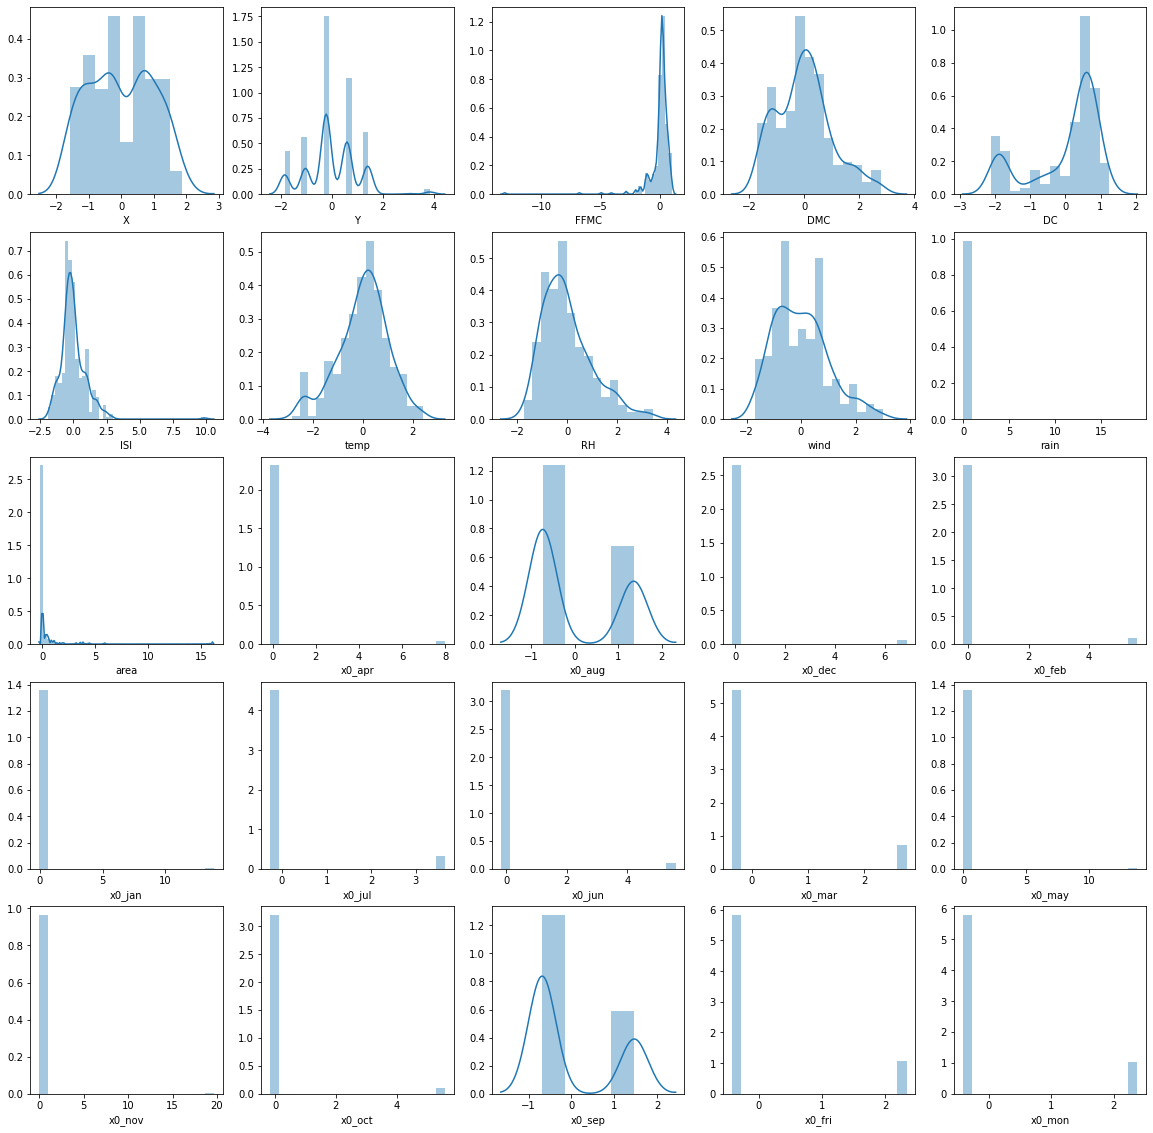

In [37]:
#plot standardized data
distribution_histogram(list(X_train.columns),5,5,20,20,df_std)

In [38]:
# import mean absolute and squared error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Create dict acc_scores to see which model is the best
mean_sq_err_std = {}
mean_abs_err_std = {}
lista_modela=[]

# Import models that will be applied on dataset

#1.model LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
model_ime=lin_reg
lista_modela.append(model_ime)

#2.model SVC kernel linear
from sklearn.svm import SVR, LinearSVR
svr_linear = SVR(kernel='linear', C=1)
model_ime=svr_linear
lista_modela.append(model_ime)

#3.model SVR_rbf
SVR_rbf=SVR()
model_ime=SVR_rbf
lista_modela.append(model_ime)

#4.model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()
model_ime=ran_for_reg
lista_modela.append(model_ime)

#5.model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model_ime=dec_tree_reg
lista_modela.append(model_ime)

#6.model ExtraTreeRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
model_ime=extra_tree
lista_modela.append(model_ime)

#7.model BaggingRegressor
from sklearn.ensemble import BaggingRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_tree = BaggingRegressor(extra_tree, random_state=0)
model_ime=bag_tree
lista_modela.append(model_ime)

#8.model KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
n_neighbor=KNeighborsRegressor()
model_ime=n_neighbor
lista_modela.append(model_ime)

#9.model Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()
model_ime=ridge
lista_modela.append(model_ime)

#10.model Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
model_ime=lasso
lista_modela.append(model_ime)



In [63]:
#fuction model acespts arguments( model,X_train_std,y_train,X_test_std,y_test)
def model(model_ime,X_tr,y_tr,X_test_s,y_tst):
    #making model
    mod=model_ime
    mod.fit(X_tr,y_tr)
    y_pred=reg.predict(X_test_s)
    #mean absolut error
    MAE=mean_absolute_error(y_test,y_pred)
    MSE=mean_squared_error(y_test,y_pred)
    #appending errors to dictionary
    mean_sq_err_std[model_ime]=MSE
    mean_abs_err_std[model_ime]=MAE
    return(model_ime,MAE,MSE,y_pred)


In [40]:
def unique_list_model(lista_modela):
    model_unique=[]
    for model in lista_modela:
        if model not in model_unique:
            model_unique.append(model)
    return(model_unique)

In [41]:
lista_mod=unique_list_model(lista_modela)
print(lista_mod)



[LinearRegression(), SVR(C=1, kernel='linear'), SVR(), RandomForestRegressor(), DecisionTreeRegressor(), ExtraTreeRegressor(random_state=0), BaggingRegressor(base_estimator=ExtraTreeRegressor(random_state=0),
                 random_state=0), KNeighborsRegressor(), Ridge(), Lasso()]


In [62]:
for mod in lista_mod:
    model(mod,X_train_std,y_train,X_test_std,y_test)

In [43]:
#Results of models 
df_ERROR = pd.DataFrame({'models': [1,2,3,4,5,6,7,8,9,10],'MAE': list(mean_abs_err_std.values()),"MSE":list(mean_sq_err_std.values())})
df_ERROR

,models,MAE,MSE
0,1,2.290518e-14,9.751454e-28
1,2,1.153463e-01,8.088002e-02
2,3,1.996787e+01,1.008835e+04
3,4,5.656164e+00,3.419826e+03
4,5,3.323923e+00,9.217960e+02
5,6,3.736385e+00,9.366113e+02
6,7,4.788308e+00,1.581749e+03
7,8,1.802768e+01,5.345400e+03
8,9,6.491514e-02,7.031068e-02
9,10,5.141525e-01,4.720165e+00


In [53]:
#Reslut of estimation of Mean squared error
lista_value_MSE=list(mean_sq_err_std.values())
print(lista_value_MSE)
Min_MSE=min(list(mean_sq_err_std.values()))
i=lista_value_MSE.index(Min_MSE)
print(f"Minimum of mean squared error is for model {lista_mod[i]},and value of MSE is {Min_MSE}")

[9.751454064970367e-28, 0.08088002384081432, 10088.352950138838, 3419.8258153859256, 921.7960284615382, 936.6112884615382, 1581.7494346307697, 5345.400021015382, 0.07031067959819713, 4.720164704091209]
Minimum of mean squared error is for model LinearRegression(),and value of MSE is 9.751454064970367e-28


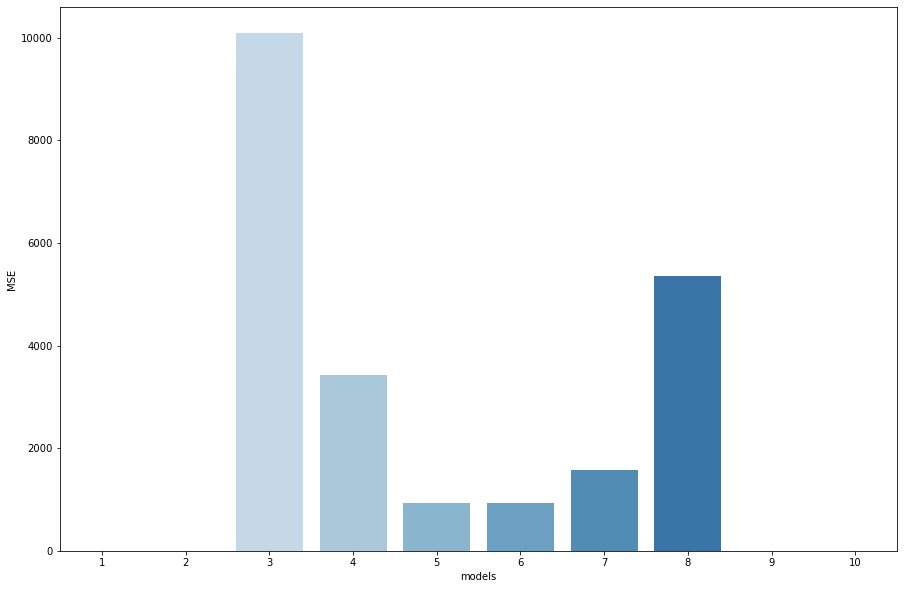

In [52]:

fig = plt.gcf()
fig.set_size_inches(15,10)
ax =sns.barplot(x="models",y="MSE",palette="Blues",data=df_ERROR,ci=None)


In [56]:
#Reslut of estimation of Mean squared error
lista_value_MAE=list(mean_abs_err_std.values())
Min_MAE=min(list(mean_abs_err_std.values()))
i=lista_value_MAE.index(Min_MAE)
print(f"Minimum of mean apsolute error is for model {lista_mod[i]},and value of MSE is {Min_MAE}")

Minimum of mean apsolute error is for model LinearRegression(),and value of MSE is 2.2905182024583856e-14


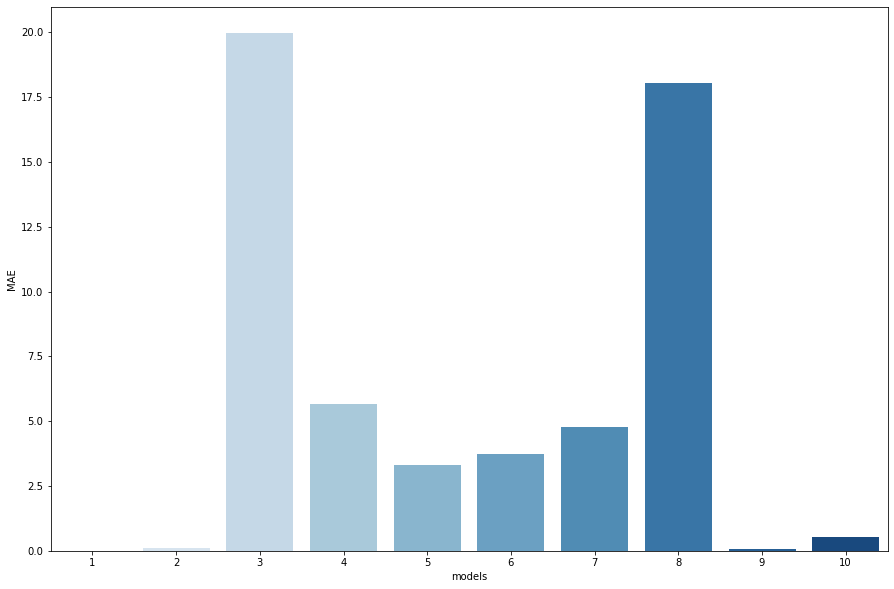

In [47]:
fig = plt.gcf()
fig.set_size_inches(15,10)
ax =sns.barplot(x="models",y="MAE",palette="Blues",data=df_ERROR,ci=None)